<a href="https://colab.research.google.com/github/HenriqueBrainer/Mackenzie/blob/main/Lab_Pandas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab: Pandas I  

O principal objetivo desse lab é você entender fazer a aquisição de dados com `Pandas` e uma exploração inicial dos dados.

<br>

Referências e Materiais úteis para este Lab:

* [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/Analise_de_dados_2023S2/blob/main/Lab_Pandas_notes.ipynb)


<br>

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/PDSH-cover.png
" width=150>

* [Jake VanderPlas. **Python Data Science Handbook**](https://jakevdp.github.io/PythonDataScienceHandbook/)

* [Pandas Cheat Sheet for Data Science in Python](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

<br>
---



# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## **CASE: Insurance**

Acesse a base de dados [`insurance`](https://github.com/Rogerio-mack/Analise_de_Dados_2024S1/raw/main/insurance.csv) para as questões a seguir.



##### Q1. Acesse os dados explore a estrutura básica dos dados de `insurance`.

> * Qual o número de caso de seguro?
> * Quantos atributos são numéricos?
> * Há quantos valores diferentes para região?
> * Qual a maior quantidade de filhos?

### **Q 1**

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Analise_de_Dados_2024S1/main/insurance.csv')
df.index.name = ''
df.head()


,age,sex,bmi,children,smoker,region,charges
,,,,,,,
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **A)**

In [29]:
len(df)

1338

### **B)**

In [30]:
df.select_dtypes('number')

,bmi,children,charges
,,,
19,27.900,0,16884.92400
18,33.770,1,1725.55230
28,33.000,3,4449.46200
33,22.705,0,21984.47061
32,28.880,0,3866.85520
...,...,...,...
50,30.970,3,10600.54830
18,31.920,0,2205.98080
18,36.850,0,1629.83350


In [63]:
#df.region.value_counts()  - detalhado
#df.region.unique() - objetos
#df.region.nunique() - qntd de objs

4

In [31]:
df.children.max()

5

##### Q2. Qual a quantidade de casos por região?

In [38]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

##### Q3. Qual a média dos pagamentos (charges) efetuados?

In [39]:
df.charges.mean()

13270.422265141257

##### Q4. Qual a média dos pagamentos (charges) dos 10 maiores pagamentos efetuados?

In [49]:
df.nlargest(10, 'charges').charges.mean()

55130.961078

##### Q5. Qual o percentual de mulheres seguradas?

In [58]:
dffemale = df[df.sex == 'female']
dffemale.sex.value_counts() / len(df)

sex
female    0.494768
Name: count, dtype: float64

##### Q6. Qual o percentual de homens seguradas?

In [59]:
dfmale = df[df.sex == 'male']
dfmale.sex.value_counts() / len(df)

sex
male    0.505232
Name: count, dtype: float64

##### Q7. Qual o valor médio pago pelos homens segurados?

In [86]:
dfmen = df[df.sex == 'male']
dfmen.charges.mean()

13956.751177721893

##### Q8. Qual a média de idade dos homens e mulheres?

In [94]:
dfmen = df[df.sex == 'male']
dffemale = df[df.sex == 'female']
print('Male =',dffemale.age.mean(), ', Female =',dfmen.age.mean())

Male = 39.503021148036254 , Female = 38.917159763313606


##### Q9. Calcule a distância interquartis dos pagamentos.

**Dica** Empregue a função `quantile()` do `Pandas` e use IQR = Q3 - Q1.



In [99]:
q3 = df.charges.quantile(0.75)
q1 = df.charges.quantile(0.25)
iqr = q3 -q1
print(iqr)

11899.625365


##### Q10. Empregue o valor IQR da questão anterior para verificar se existem *outliers* dos pagamentos.

**Dica** *outliers* são dados fora do intervalo $[Q1 - 1.5 IQR, Q3 + 1.5 IQR]$

In [102]:
df[df.charges < (q1 - 1.5*iqr)], df[df.charges > (q3 + 1.5*iqr)]

(Empty DataFrame
 Columns: [age, sex, bmi, children, smoker, region, charges]
 Index: [],
       age     sex     bmi  children smoker     region      charges
                                                                   
 14     27    male  42.130         0    yes  southeast  39611.75770
 19     30    male  35.300         0    yes  southwest  36837.46700
 23     34  female  31.920         1    yes  northeast  37701.87680
 29     31    male  36.300         2    yes  southwest  38711.00000
 30     22    male  35.600         0    yes  southwest  35585.57600
 ...   ...     ...     ...       ...    ...        ...          ...
 1300   45    male  30.360         0    yes  southeast  62592.87309
 1301   62    male  30.875         3    yes  northwest  46718.16325
 1303   43    male  27.800         0    yes  southwest  37829.72420
 1313   19  female  34.700         2    yes  southwest  36397.57600
 1323   42  female  40.370         2    yes  southeast  43896.37630
 
 [139 rows x 7 columns])

##### Q11. Faça um gráfico de caixa dos valores de `charges` para homens e mulheres.

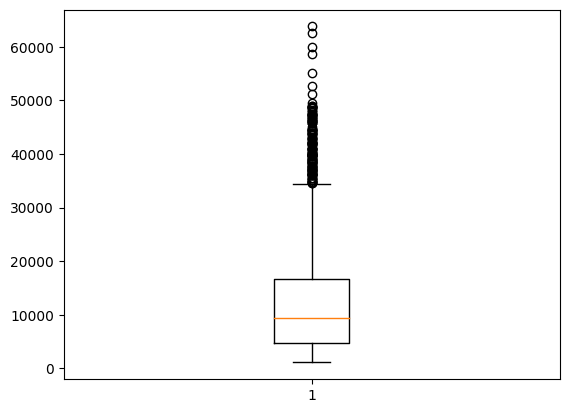

In [103]:
import matplotlib.pyplot as plt

plt.boxplot(df.charges)
plt.show()

Q12. Qual o percentual de seguros pagos pelas mulheres?


In [104]:
df[ df.sex == 'female' ].charges.sum()

8321061.194619